In [24]:
# This notebook implements and train a classifier on top of the mediapipe hand landmarker.
# Its input will be the hand landmark and its output will be the label of the gesture done by the user.
# It will be done using the keras framework.
# The dataset used to train the classifier is composed by data extracted by videos, processed through the hand landmarker, and the label are assigned 
# previously, one for each video.



import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('D:\progetto_video\dataset_nuovo_modello\dataset_new.csv')

# The dataset is present on github, download, unzip and change the file path.


# The last colums is the label, the rest are the variables
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values
labels[:]-=1


# One-hot encode the labels 
labels = tf.keras.utils.to_categorical(labels)


# Normalization of the features: after various attempts i decided to leave the dataset as it is.
#The reason for that is due to the hand landmarker outputing somewhat already normalized values.


features = features.astype('float32')



#Normalization: we apply a simple normalization as other types didn't work as well on this dataset
#massimi = np.max(features, axis=0)
#minimi = np.min(features, axis=0)
#features = 2* (features - minimi) / (massimi - minimi) - 1


features, X_test, labels, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


# Define the model architecture: a fully connected network with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(features.shape[1],)), # Input layer with size matching the number of features
    Dropout(0.5), #dropout layer
    Dense(128, activation='relu'), # Hidden layer
    Dropout(0.5), #dropout layer
    Dense(labels.shape[1], activation='softmax')  # Output layer with size matching the number of classes
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Define the EarlyStopping callback: it will be used to stop the training to prevent overfitting, and recover the best performing iteration
# I decided to use a high patience as the model has high base performance and needed time to saturate 

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=20,         # Number of epochs with no improvement to wait
    restore_best_weights=True, # Restore the best weights
    verbose=1           # Print messages when early stopping occurs
)


# Train the model and store the training history
history = model.fit(features, labels, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])




<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Marco\AppData\Local\Temp\ipykernel_8552\4228228180.py:18: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv('D:\progetto_video\dataset_nuovo_modello\dataset_new.csv')


Epoch 1/100


C:\Users\Marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3867 - loss: 1.5838 - val_accuracy: 0.8721 - val_loss: 0.4125
Epoch 2/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8302 - loss: 0.4896 - val_accuracy: 0.9464 - val_loss: 0.2062
Epoch 3/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9006 - loss: 0.3129 - val_accuracy: 0.9550 - val_loss: 0.1754
Epoch 4/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9235 - loss: 0.2476 - val_accuracy: 0.9533 - val_loss: 0.1378
Epoch 5/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9360 - loss: 0.2103 - val_accuracy: 0.9682 - val_loss: 0.1043
Epoch 6/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9410 - loss: 0.1922 - val_accuracy: 0.9734 - val_loss: 0.0918
Epoch 7/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9451 - loss: 0.1803 - val_accuracy: 0.9728 - val_loss: 0.0886
Epoch 8/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9507 - loss: 0.1639 - val_

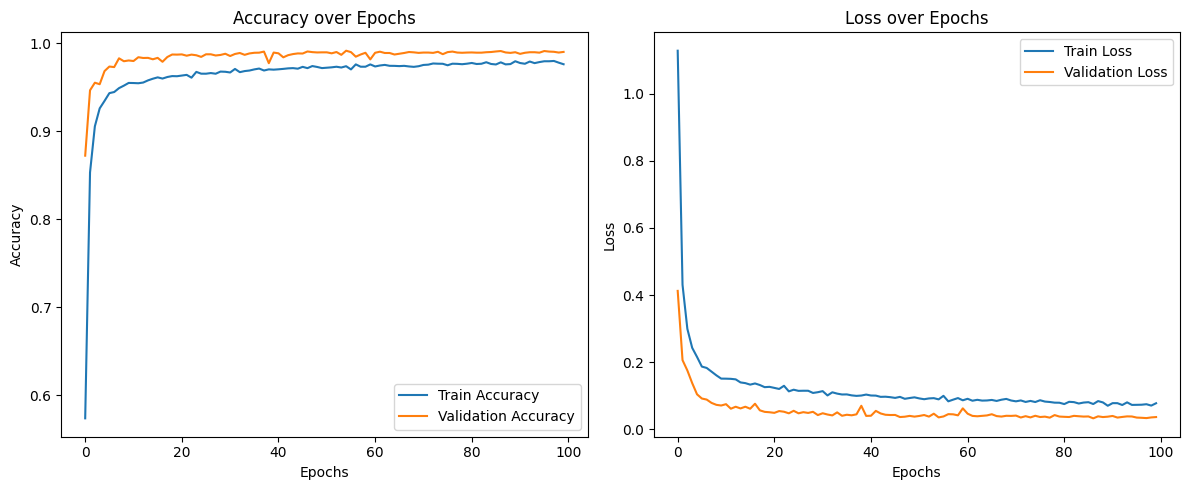

In [25]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# We obatined very good results on both the validation and training set.
# Validation having higher accuracy and lower loss is due to the Dropout applied in the network
# Furthermore, we see there is no overfitting

In [26]:
# Test set performance evaluation: we obtain > 99% accuracy, very strong result: the model generalizes well

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9918 - loss: 0.0278
Test accuracy: 0.9906


In [3]:
model.summary()

File downloaded succesfully


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 50,568 (197.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [28]:
# Saving the model
import os
model.save(os.path.join('D:\progetto_video\model_new','model_new.h5'))

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Marco\AppData\Local\Temp\ipykernel_8552\406646084.py:2: SyntaxWarning: invalid escape sequence '\p'
  model.save(os.path.join('D:\progetto_video\model_new','model_new.h5'))


In [27]:
# More in depth analysis of the results on the test set
y_pred = model.predict(X_test)  

# Convert one-hot encoded predictions to label indices
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to label indices
y_test_labels = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_labels))

# As we can see, the results are very good. 
# On all evaluation metrics we get > .99 
# The model has generalized perfectly to the test set, without overfitting. Furthermore, the model is complex enough to get close to maximum accuracy 
# on the test set for every single one of the gestures.

318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351
           1       0.99      0.99      0.99      1685
           2       0.99      0.99      0.99      1480
           3       0.99      0.99      0.99      1401
           4       0.99      0.99      0.99      1068
           5       0.99      0.99      0.99      1178
           6       1.00      0.99      0.99      1357
           7       0.98      1.00      0.99       627

    accuracy                           0.99     10147
   macro avg       0.99      0.99      0.99     10147
weighted avg       0.99      0.99      0.99     10147



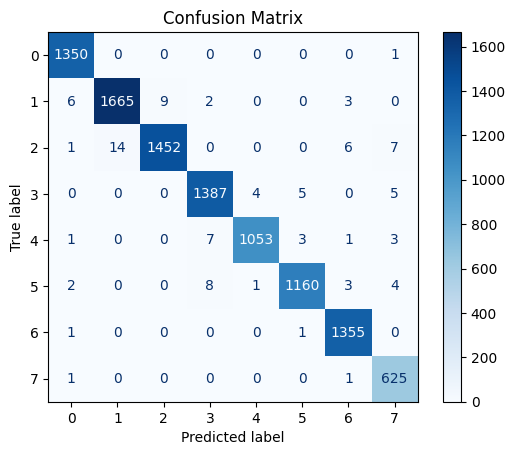

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(len(cm)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


#No major flaws detected in the confusion matrix, the classes are rarely confused, as was already apparent from the previous analysis